<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema08/01-bag-of-words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install tensorflow==1.14

# Bag of Words para Spam/Ham

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import string
import requests
import io
from zipfile import ZipFile
from tensorflow.contrib import learn

In [0]:
save_file_name = os.path.join('sample_data','spam_data.csv')
#save_file_name = os.path.join('..','..','datasets', 'spam_data.csv')
if os.path.isfile(save_file_name):
    #el fichero existe y solo hay que cargarlo
    text_data = []
    with open(save_file_name, 'r') as temp_output_file:
        reader = csv.reader(temp_output_file)
        for row in reader:
            text_data.append(row)
else: 
    ##el fichero no existe y debemos descargarlo
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
    req = requests.get(url)
    z = ZipFile(io.BytesIO(req.content))
    file = z.read('SMSSpamCollection')
    ##Transformar el fichero binario a texto
    text_data = file.decode()
    text_data = text_data.encode('ascii', errors='ignore')
    text_data = text_data.decode().split('\n')
    text_data = [x.split('\t') for x in text_data if len(x)>=1]
    ##Guardar datos en CSV
    with open(save_file_name, 'w') as temp_output_file:
        writer = csv.writer(temp_output_file)
        writer.writerows(text_data)

        

In [5]:
text_data[0:5]

[['ham',
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
 ['ham', 'Ok lar... Joking wif u oni...'],
 ['spam',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
 ['ham', 'U dun say so early hor... U c already then say...'],
 ['ham', "Nah I don't think he goes to usf, he lives around here though"]]

In [0]:
texts = [x[1] for x in text_data]
target = [x[0] for x in text_data]

In [7]:
print(type(texts))
texts[0:5]

<class 'list'>


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [8]:
target[0:10]

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam']

In [9]:
target = [1 if x == 'spam' else 0 for x in target] # pasamos  Spam a cero y unos
target[0:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

### Pre procesado del texto

In [10]:
# EJEMPLO DE QUITAR LOS SIGNOS DE PUNTUACION
ejemplo = 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
print(ejemplo)
ejemplo1 = [''.join(c for c in x if c not in string.punctuation) for x in ejemplo]
print(ejemplo1)
text = [' '.join(x.split()) for x in ejemplo1]
print(text)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
['G', 'o', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'j', 'u', 'r', 'o', 'n', 'g', ' ', 'p', 'o', 'i', 'n', 't', '', ' ', 'c', 'r', 'a', 'z', 'y', '', '', ' ', 'A', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'i', 'n', ' ', 'b', 'u', 'g', 'i', 's', ' ', 'n', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'l', 'a', ' ', 'e', ' ', 'b', 'u', 'f', 'f', 'e', 't', '', '', '', ' ', 'C', 'i', 'n', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'g', 'o', 't', ' ', 'a', 'm', 'o', 'r', 'e', ' ', 'w', 'a', 't', '', '', '']
['G', 'o', '', 'u', 'n', 't', 'i', 'l', '', 'j', 'u', 'r', 'o', 'n', 'g', '', 'p', 'o', 'i', 'n', 't', '', '', 'c', 'r', 'a', 'z', 'y', '', '', '', 'A', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', '', 'o', 'n', 'l', 'y', '', 'i', 'n', '', 'b', 'u', 'g', 'i', 's', '', 'n', '', 'g', 'r', 'e', 'a', 't', '', 'w', 'o', 'r', 'l', 'd', '', 'l', 'a', 

In [0]:
texts = [x.lower() for x in texts] # Convertir los textos a minúscula
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts] # Eliminamos signos de puntuación
texts = [''.join(c for c in x if c not in '0123456789') for x in texts] # Eliminamos los números
texts = [' '.join(x.split()) for x in texts] # Eliminar espacios en blanco y separadores extras

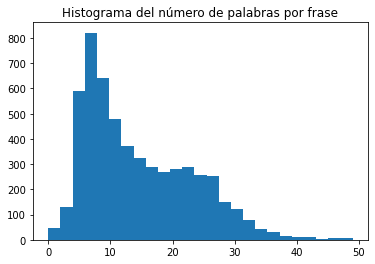

In [20]:
texts_lengths = [len(x.split()) for x in texts]
texts_lengths = [x for x in texts_lengths if x < 50]
plt.hist(texts_lengths, bins=25)
plt.title("Histograma del número de palabras por frase")
plt.show()

In [0]:
sentence_size = 40
min_word_freq = 3

In [0]:
vocab_processor = learn.preprocessing.VocabularyProcessor(sentence_size, min_frequency=min_word_freq)
vocab_processor.fit_transform(texts)
transformed_texts = np.array([x for x in vocab_processor.transform(texts)])
embedding_size = len(np.unique(transformed_texts))

In [24]:
embedding_size # PALABRAS UNICAS

2108

In [25]:
transformed_texts

array([[  44,  455,    0, ...,    0,    0,    0],
       [  47,  315, 1440, ...,    0,    0,    0],
       [  46,  465,    9, ...,    0,    0,    0],
       ...,
       [   0,   59,    9, ...,    0,    0,    0],
       [   5,  493,  108, ...,    0,    0,    0],
       [   0,   40,  474, ...,    0,    0,    0]])

In [0]:
texts

In [0]:
train_idx = np.random.choice(len(texts), round(len(texts)*0.8), replace=False)
test_idx = np.array(list(set(range(len(texts)))-set(train_idx)))

texts_train = [x for ix, x in enumerate(texts) if ix in train_idx]
texts_test = [x for ix, x in enumerate(texts) if ix in test_idx]
target_train = [x for ix, x in enumerate(target) if ix in train_idx ]
target_test = [x for ix, x in enumerate(target) if ix in test_idx]

In [0]:
identity_matrix = tf.diag(tf.ones(shape = [embedding_size]))

In [0]:
A = tf.Variable(tf.random_normal(shape=[embedding_size,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [0]:
x_data = tf.placeholder(shape=[sentence_size], dtype=tf.int32)
y_target = tf.placeholder(shape = [1,1], dtype = tf.float32)

In [0]:
x_embed = tf.nn.embedding_lookup(identity_matrix, x_data)# Tranformo la matriz en un vector de unos y ceros
x_col_sums = tf.reduce_sum(x_embed,0)

In [0]:
x_col_sum_2D = tf.expand_dims(x_col_sums,0)
model_output = tf.add(tf.matmul(x_col_sum_2D, A), b)

In [0]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [0]:
prediction = tf.sigmoid(model_output)

In [0]:
my_optim = tf.train.GradientDescentOptimizer(0.001)
train_step = my_optim.minimize(loss)

In [0]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [42]:
loss_vect = []
train_acc_all = []
train_acc_avg = []
for ix, t in enumerate(vocab_processor.fit_transform(texts_train)):
    y_data = [[target_train[ix]]]
    session.run(train_step, feed_dict={x_data:t, y_target:y_data})
    
    temp_loss = session.run(loss, feed_dict={x_data:t, y_target:y_data})
    loss_vect.append(temp_loss)
    
    if(ix+1)%10==0:
        print("Observación de entrenamiento #{}, Perdidas = {}".format(ix+1, temp_loss))
    
    [[temp_pred]] = session.run(prediction, feed_dict={x_data:t, y_target:y_data})
    train_acc_temp = target_train[ix]==np.round(temp_pred)
    train_acc_all.append(train_acc_temp)
    if len(train_acc_all)>=50:
        train_acc_avg.append(np.mean(train_acc_all[-50:]))
        train_acc_all = []

Observación de entrenamiento #10, Perdidas = 0.6581526398658752
Observación de entrenamiento #20, Perdidas = 12.518935203552246
Observación de entrenamiento #30, Perdidas = 0.300697386264801
Observación de entrenamiento #40, Perdidas = 0.010377372615039349
Observación de entrenamiento #50, Perdidas = 3.068955659866333
Observación de entrenamiento #60, Perdidas = 0.006913474295288324
Observación de entrenamiento #70, Perdidas = 0.0061323982663452625
Observación de entrenamiento #80, Perdidas = 0.0006953065167181194
Observación de entrenamiento #90, Perdidas = 5.614883775706403e-07
Observación de entrenamiento #100, Perdidas = 0.0001785149797797203
Observación de entrenamiento #110, Perdidas = 2.429659366607666
Observación de entrenamiento #120, Perdidas = 0.16097690165042877
Observación de entrenamiento #130, Perdidas = 8.254305839538574
Observación de entrenamiento #140, Perdidas = 0.6017782688140869
Observación de entrenamiento #150, Perdidas = 1.573388934135437
Observación de entrena

In [43]:
train_acc_all

[True, True, True, True, False, True, True, True, True]

(0.0, 1.0)

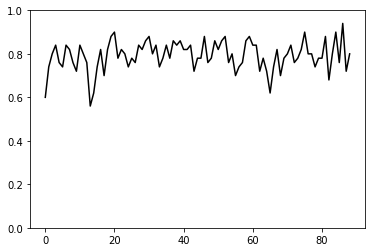

In [44]:
plt.plot(train_acc_avg, 'k-', label='Precisión')
plt.ylim([0,1])

In [0]:
test_acc_all = []
test_acc_avg = []
for ix, t in enumerate(vocab_processor.fit_transform(texts_test)):
    y_data = [[target_test[ix]]]
    
  
    
    [[temp_pred]] = session.run(prediction, feed_dict={x_data:t, y_target:y_data})
    test_acc_temp = target_test[ix]==np.round(temp_pred)
    test_acc_all.append(test_acc_temp)
    if len(test_acc_all)>=50:
        test_acc_avg.append(np.mean(test_acc_all[-50:]))
        test_acc_all = []
    
    if(ix+1)%50==0:
        print("Observación de entrenamiento #{}".format(ix+1))
        print("Frase: {}".format(t))
        print("Es {} y la predicción dice: {}".format(y_data, temp_pred))

In [46]:
print("Eficacia de predicción globale en test {}".format(np.mean(test_acc_all)))

Eficacia de predicción globale en test 0.8


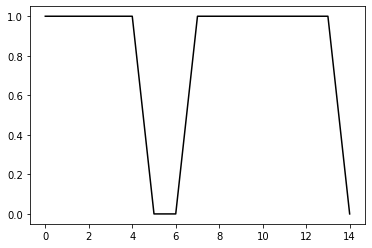

In [47]:
plt.plot(test_acc_all, 'k-', label = "Eficacia en la predicción")